<a href="https://colab.research.google.com/github/broskunta/PyTorch-Linear-Regression/blob/main/Linear_Regression_with_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression 1D via SGD

How to use SGD to train a model

Preparation

In [2]:
# import libraries
import torch
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits import mplot3d

In [3]:
# The class for plot the diagram

class plot_error_surfaces(object):

    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()

    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)

    # Plot diagram
    def final_plot(self):
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

Make Some Data

In [4]:
# set manual seed

torch.manual_seed(1)

In [5]:
# set up actuant data
X = torch.arange(-3,3,0.1).view(-1,1)
f = 1 * X - 1
Y = f + 0.1 * torch.randn(X.size())

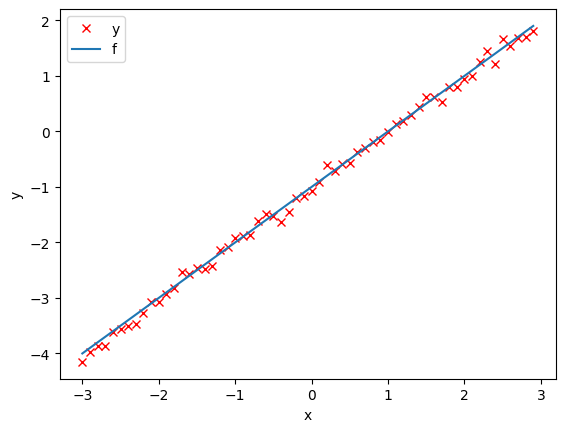

In [6]:
# plot the data

plt.plot(X.numpy(), Y.numpy(),'rx',label='y')
plt.plot(X.numpy(), f.numpy(),label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Create the model and cost function (SGD)

In [7]:
# define the forward function
def forward(x):
    return w * x + b

In [8]:
# define the cost function
def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

Create an error surface plot to visualize the data

<Figure size 640x480 with 0 Axes>

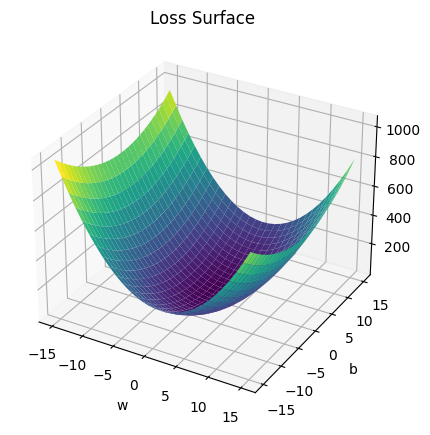

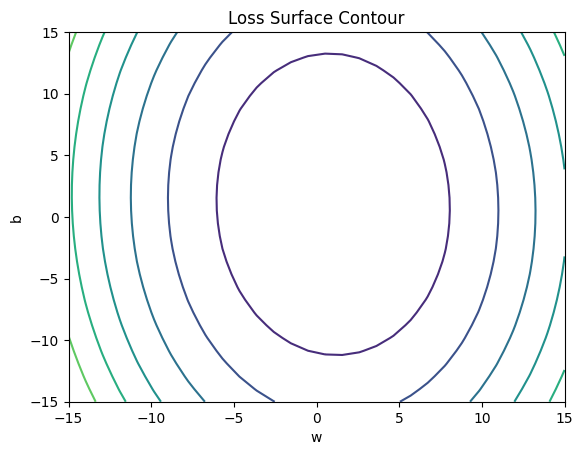

In [9]:
get_surface = plot_error_surfaces(15,15,X,Y, 30)

## Train the Model: Batch Gradient Descent

In [10]:
# define the parameter weigth and bias

w = torch.tensor(-15.0, requires_grad= True)
b = torch.tensor(-10.0, requires_grad= True)



In [11]:
# Set learning rate and create an empty list for the loss
lr = 0.1
LOSS_BGD = []

In [14]:
# DEFINE THE TRAIN_MODEL FUNCTION

def train_model(iters):
    # loop
    for epoch in range(iters):
        #make prediction
        Yhat = forward(X)

        #calculate the error
        loss = criterion(Yhat, Y)

        #set for plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        get_surface.plot_ps()

        #store the loss
        LOSS_BGD.append(loss)

        # backward pass
        loss.backward()

        # update parameters
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data

        # zero the gradients
        w.grad.data.zero_()
        b.grad.data.zero_()

Run the training for 10 epochs

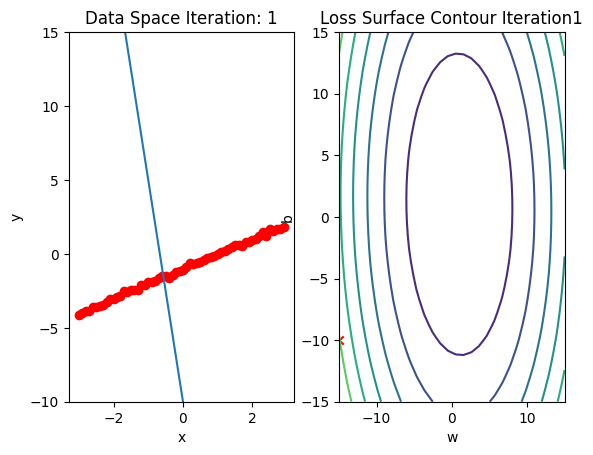

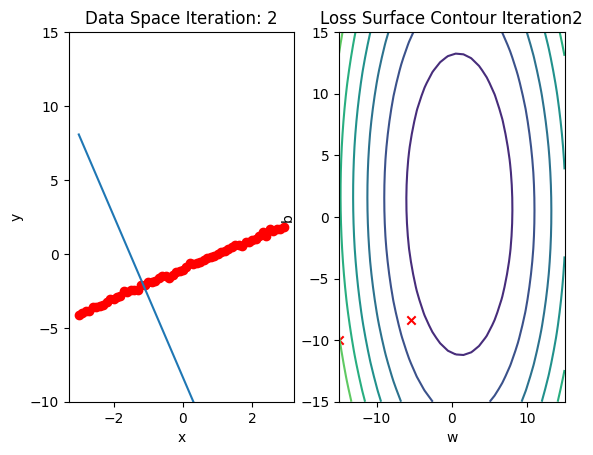

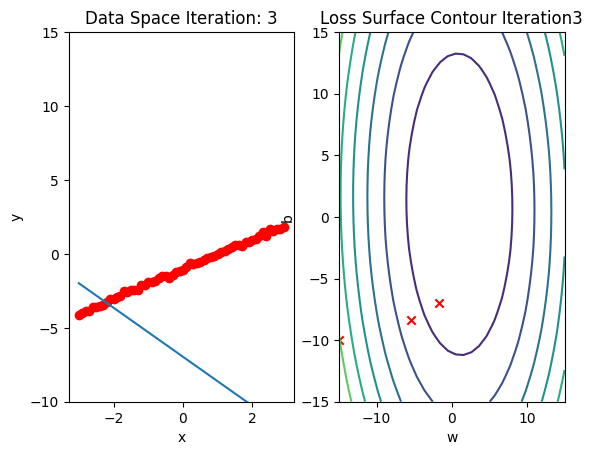

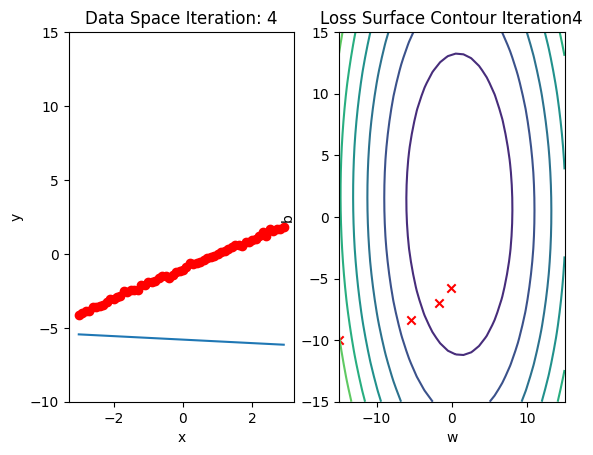

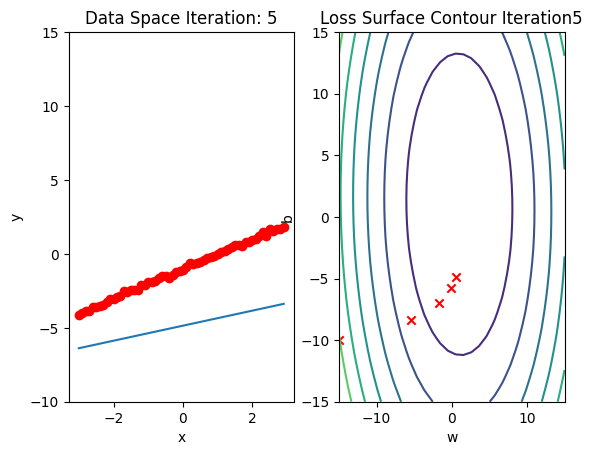

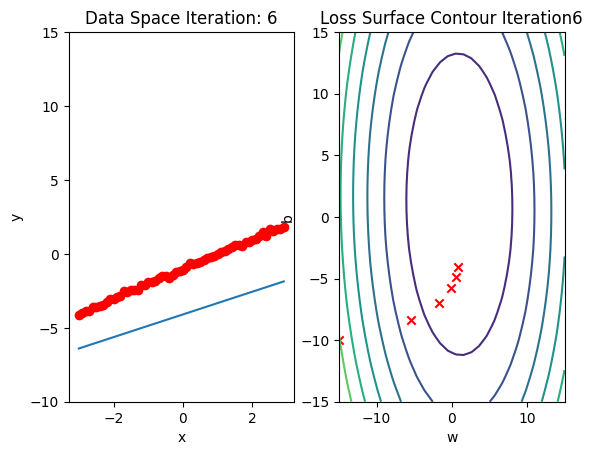

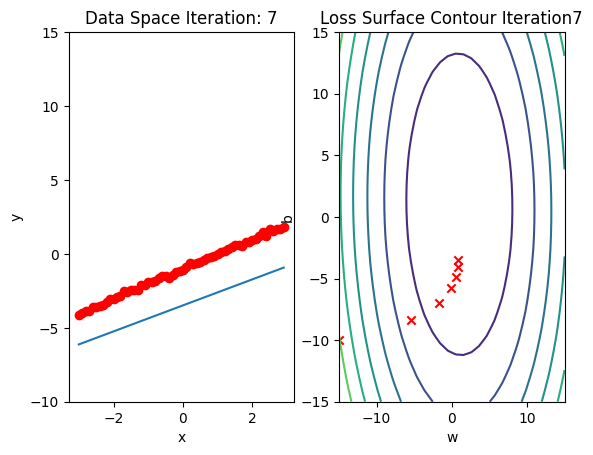

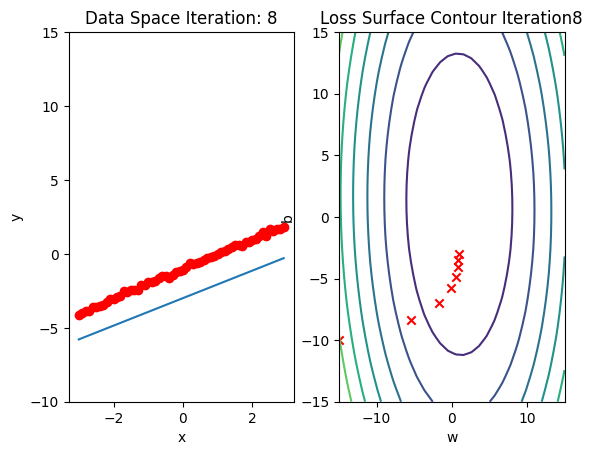

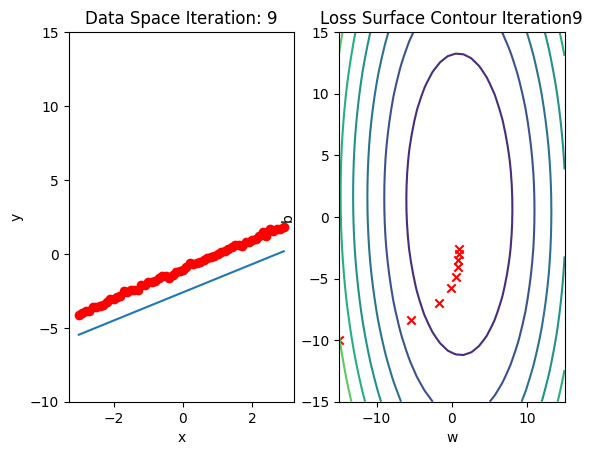

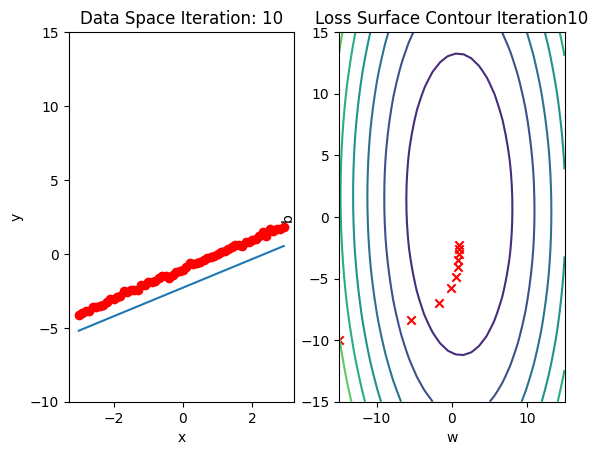

In [15]:
train_model(10)

## Train the model: SGD. Thats stochastic gradient descent. Get it!!!

In [26]:
# create the surface to visualize the data
get_surface = plot_error_surfaces(15, 13, X, Y, 30, go= False)

In [27]:
# create the empty list for the SDG loss
LOSS_SGD = []

In [28]:
# define the parameters. weight and bias
w = torch.tensor(-15.0, requires_grad= True)
b = torch.tensor(-10.0, requires_grad= True)

In [29]:

# define the train model function

def train_model_SDG(iters):
    # loop
    for epoch in range (iters):
        Yhat = forward(X)

        #store the loss
        LOSS_SGD.append(criterion(Yhat, Y).tolist())

        for x, y in zip(X,Y):

            #make prediction
            yhat = forward(x)

            # calculate the loss
            loss = criterion(yhat, y)

            #section for plotting
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())

            #backwward pass
            loss.backward()

            # update parameter slope and bias
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data

            # zero the gradients
            w.grad.data.zero_()
            b.grad.data.zero_()

        #plot surface and data space after epoch
        get_surface.plot_ps()

RUn the model for 10 epochs

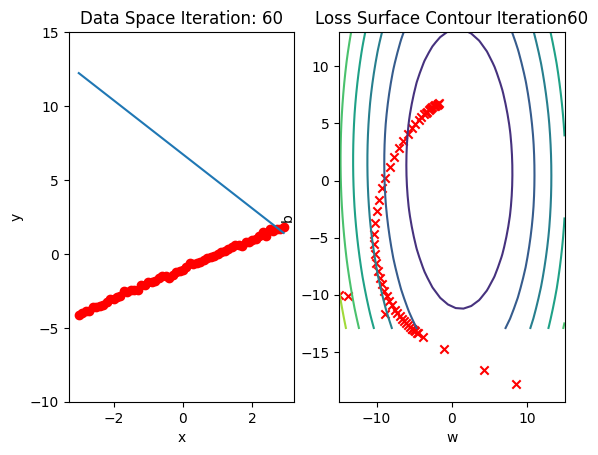

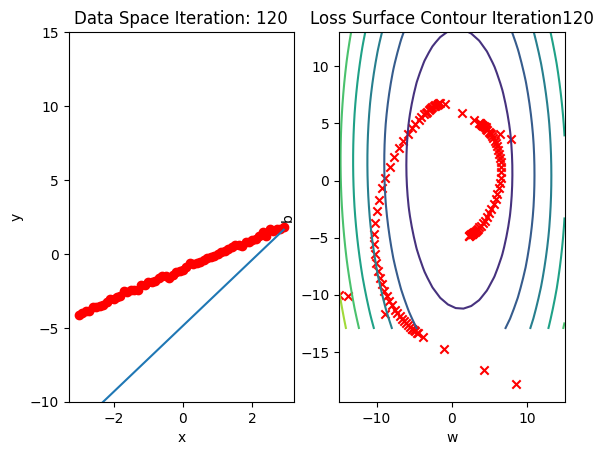

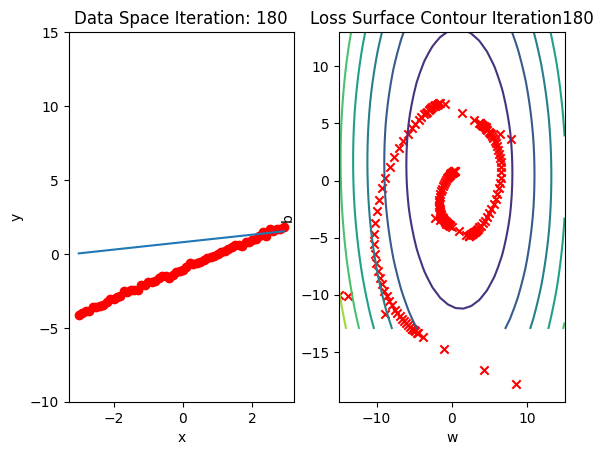

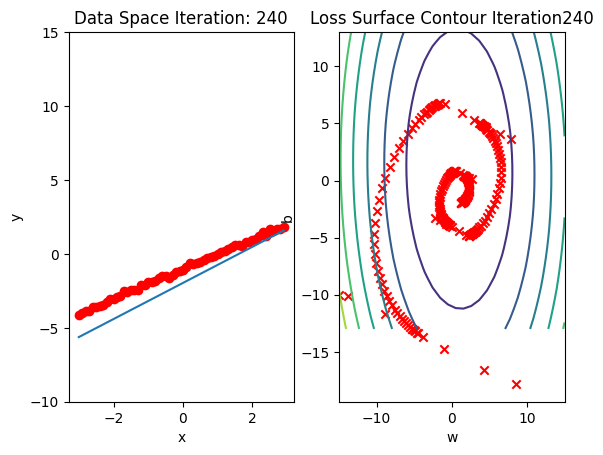

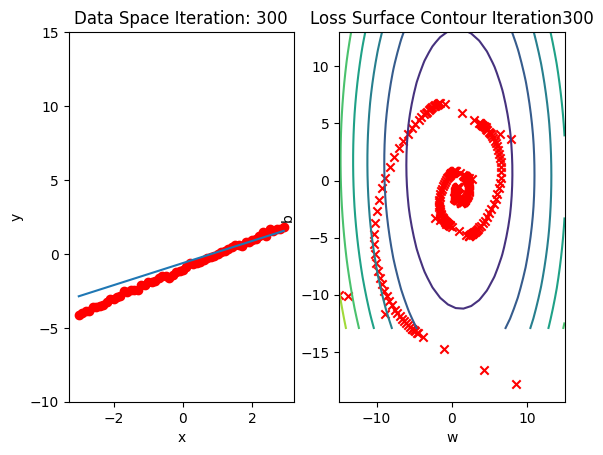

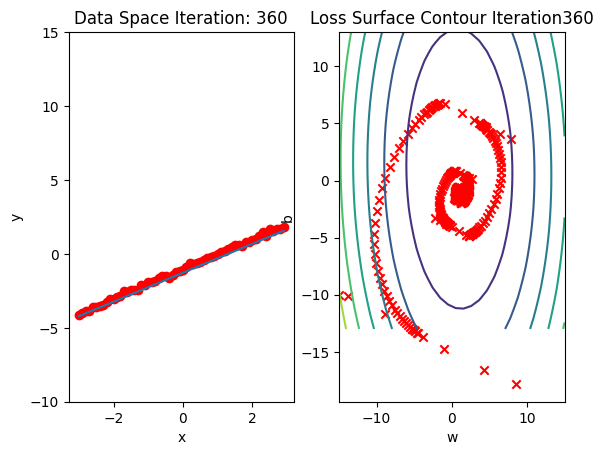

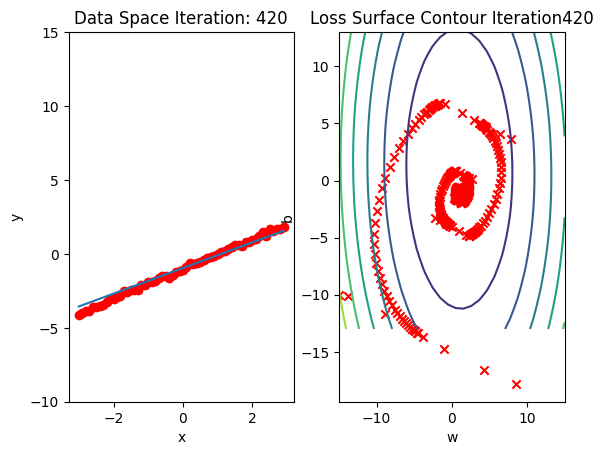

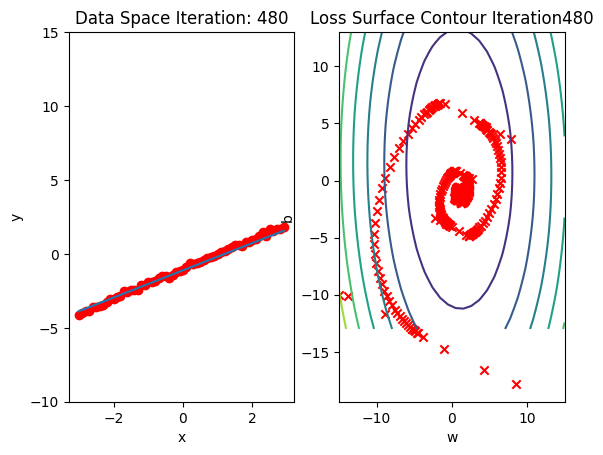

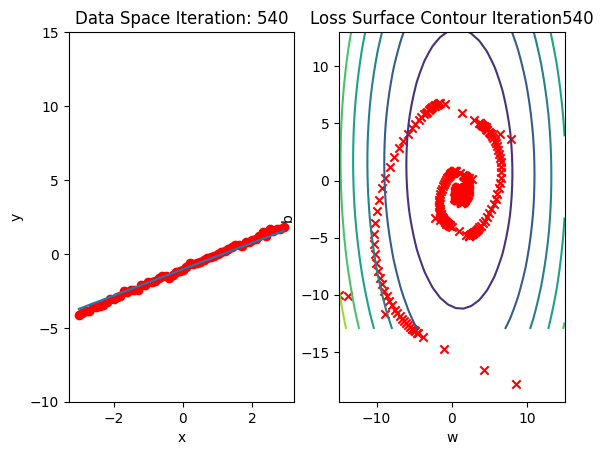

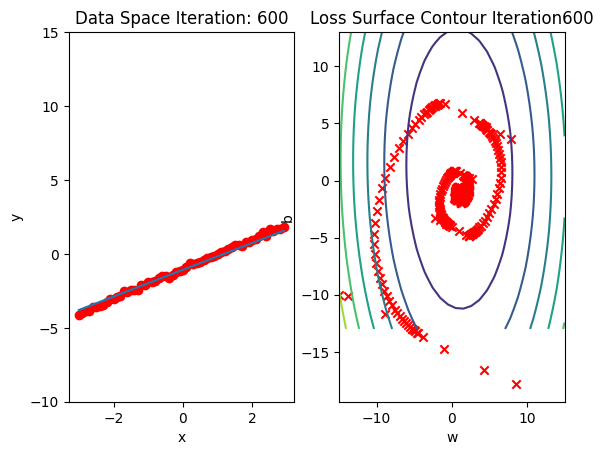

In [30]:
train_model_SDG(10)

Compare the loss of both BGD and SGD

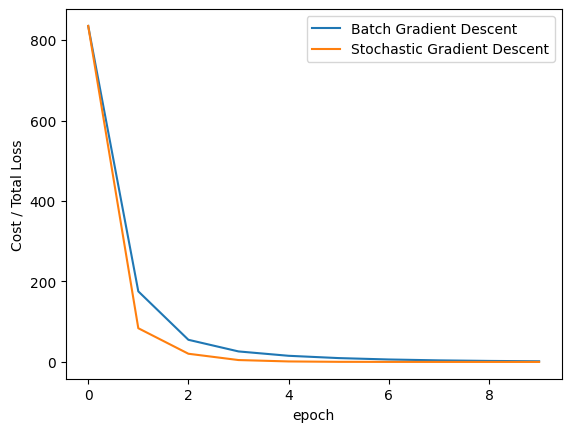

In [31]:
# plot the loss BGD and SGD
LOSS_BGD = [loss.detach().numpy() for loss in LOSS_BGD]
plt.plot(LOSS_BGD, label = 'Batch Gradient Descent')
plt.plot(LOSS_SGD, label = 'Stochastic Gradient Descent')
plt.xlabel('epoch')
plt.ylabel('Cost / Total Loss')
plt.legend()
plt.show()

## Using dataloader for SGD

In [32]:
# import the library for the dataloader
from torch.utils.data import Dataset, DataLoader

In [33]:
#  Create Dataset Class

class Data(Dataset):

    # Constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = 1 * self.x - 1
        self.len = self.x.shape[0]

    # Getter
    def __getitem__(self,index):
        return self.x[index], self.y[index]

    # Return the length
    def __len__(self):
        return self.len

In [34]:
# create a dataset object and check the length of the dataset

dataset = Data()
print('The length of the dataset is: ', len(dataset))

The length of the dataset is:  60


## Obtain the first training point


In [35]:
x, y = dataset[0]
print("(", x, ", ", y, ")")

( tensor([-3.]) ,  tensor([-4.]) )


In [36]:
# obtain the first 3 xy values in the dataset
x , y = dataset[0:3]
print("The first 3 X values are: ", x)
print("The first 3 Y values are: ", y)

The first 3 X values are:  tensor([[-3.0000],
        [-2.9000],
        [-2.8000]])
The first 3 Y values are:  tensor([[-4.0000],
        [-3.9000],
        [-3.8000]])


## Create a surface to visualize the data space


In [37]:
get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

Create a dataloader object using the constructor

In [38]:
trainloader = DataLoader(dataset=dataset, batch_size = 1)

In [40]:
# create the parameters weight and bias

w = torch.tensor(-15.0, requires_grad= True)
b = torch.tensor(-10.0, requires_grad= True)

In [41]:
# create the empty for the loss
LOSS_LOADER = []

In [42]:
# DEFINE THE TRAIN MODEL FUNCTION

def train_model_DataLoader (epochs):
    # loop
    for epoch in range (epochs):
        #make preds
        Yhat = forward(X)

        #store the loss
        LOSS_LOADER.append(criterion(Yhat, Y).tolist())

        for x, y in trainloader:

            #make prediction
            yhat = forward(x)

            #get the loss
            loss = criterion(yhat, y)

            #plotting
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())

            #backward pass
            loss.backward()

            #update the parameter using the gradient and lr
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data

            # zero the paramters
            w.grad.data.zero_()
            b.grad.data.zero_()

        #plot the surface data space after each iteration
        get_surface.plot_ps()

Train for 10 epochs


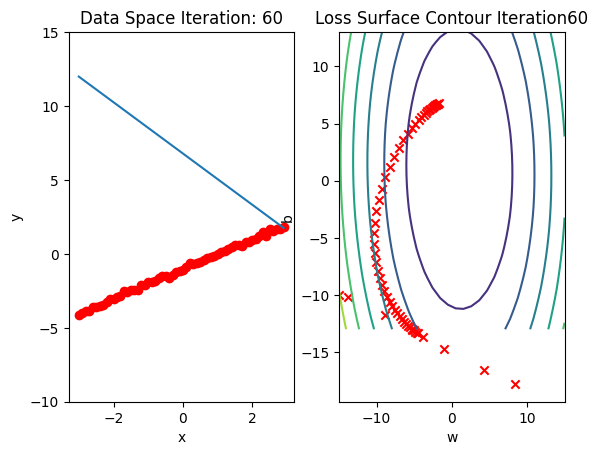

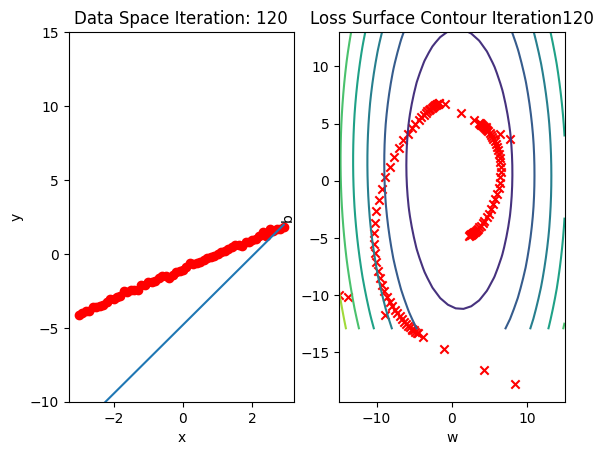

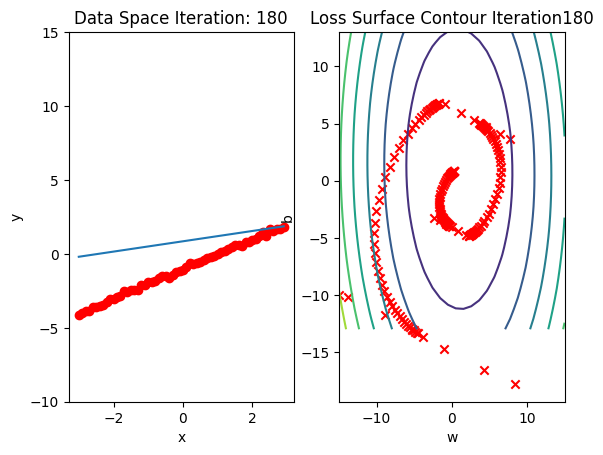

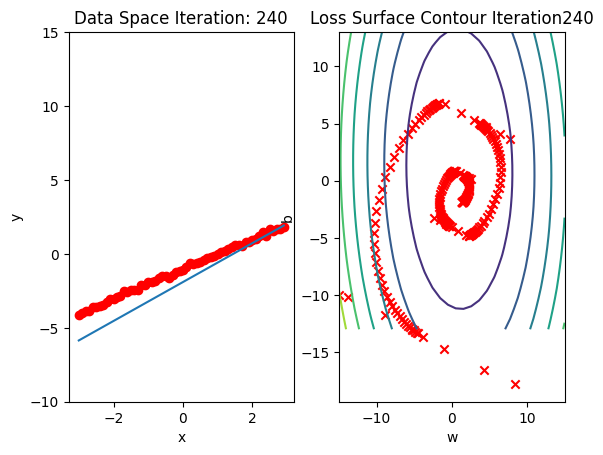

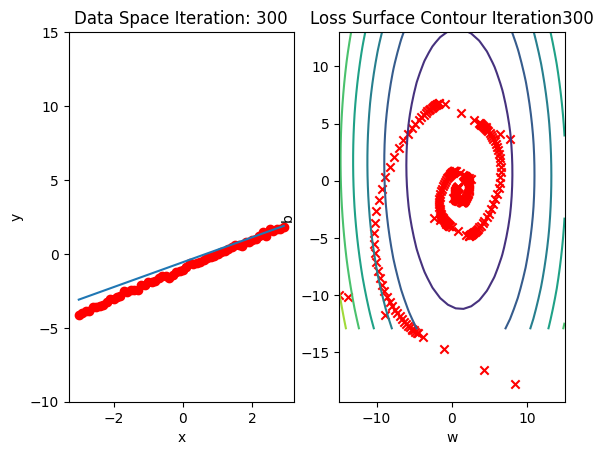

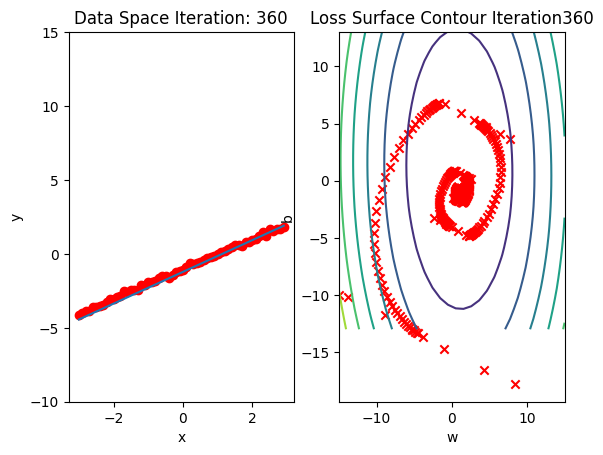

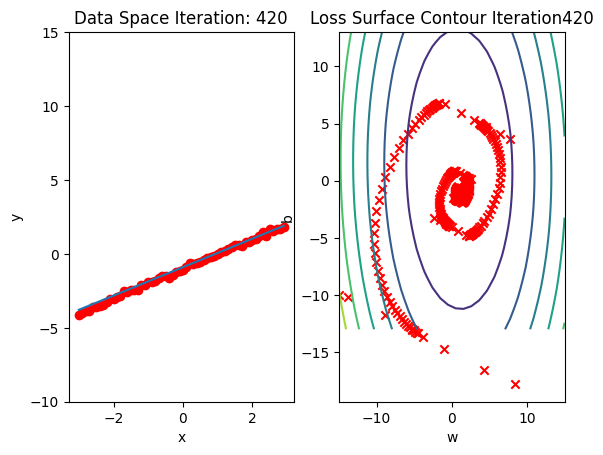

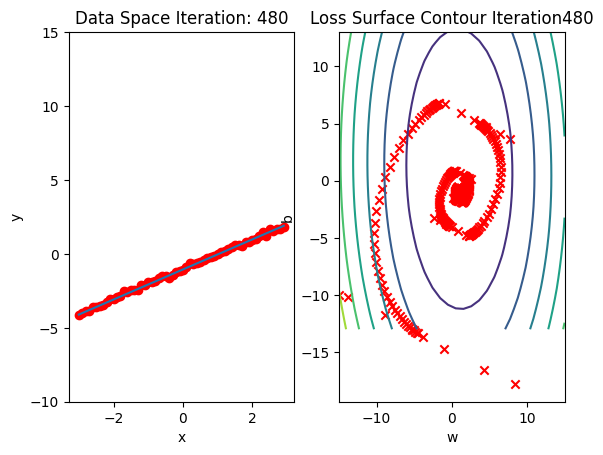

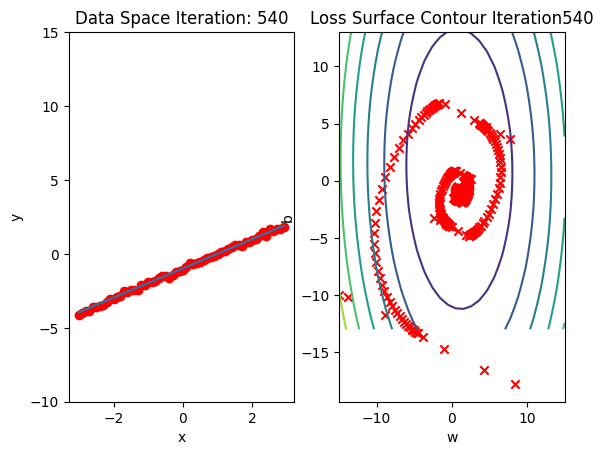

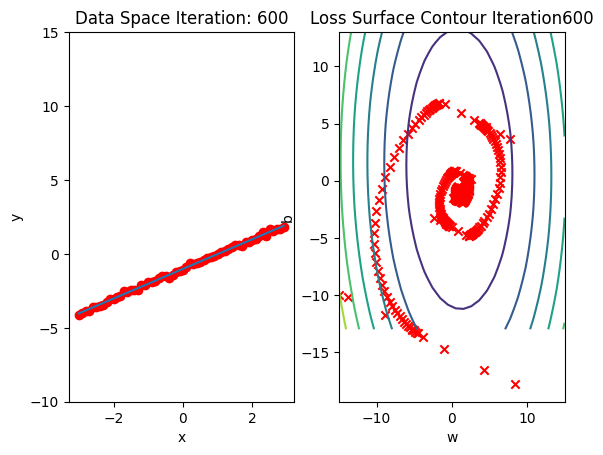

In [43]:
train_model_DataLoader(10)

Compare the loss of both gradient descent as SGS

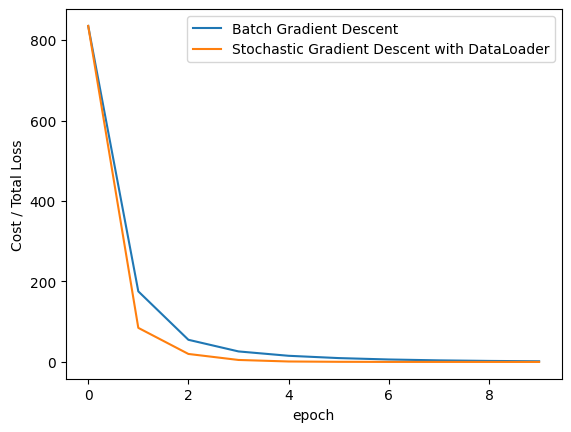

In [44]:
# plot the loss
plt.plot(LOSS_BGD, label = 'Batch Gradient Descent')
plt.plot(LOSS_LOADER, label = 'Stochastic Gradient Descent with DataLoader')
plt.xlabel('epoch')
plt.ylabel('Cost / Total Loss')
plt.legend()
plt.show()

## Practice

For practice, try to use SGD with DataLoader to train model with 10 iterations. Store the total loss in LOSS. We are going to use it in the next question.

In [45]:
# Practice: Use SGD with trainloader to train model and store the total loss in LOSS

LOSS = []
w = torch.tensor(-12.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

In [48]:
def train_model(iters):
    #loop
    for epoch in range(iters):
        #make preds
        Yhat = forward(X)

        #store the loss
        LOSS.append(criterion(Yhat, Y).tolist())

        for x,y in trainloader:

            #make pred
            yhat = forward(x)

            #calculate loss
            loss = criterion(yhat, y)

            #plot
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())

            # backward pass
            loss.backward()

            #update the parameters
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data

            #clear the gradients to zero
            w.grad.data.zero_()
            b.grad.data.zero_()

        #plot the data surface for each iteration
        get_surface.plot_ps()

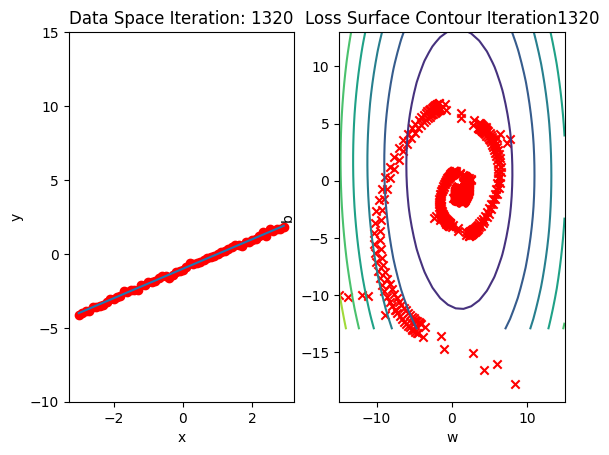

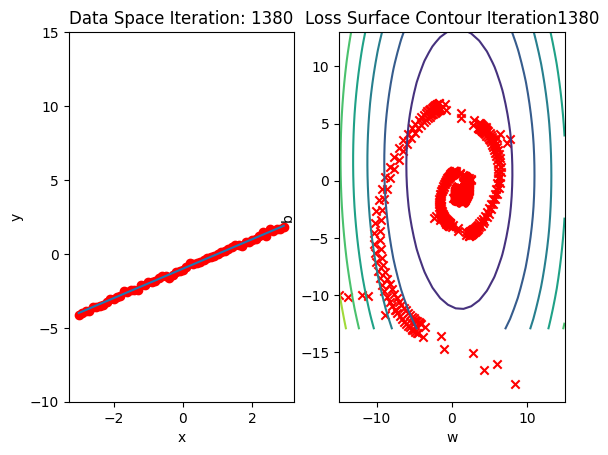

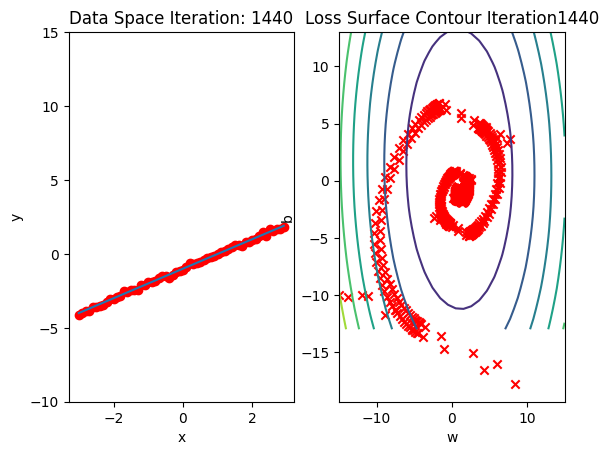

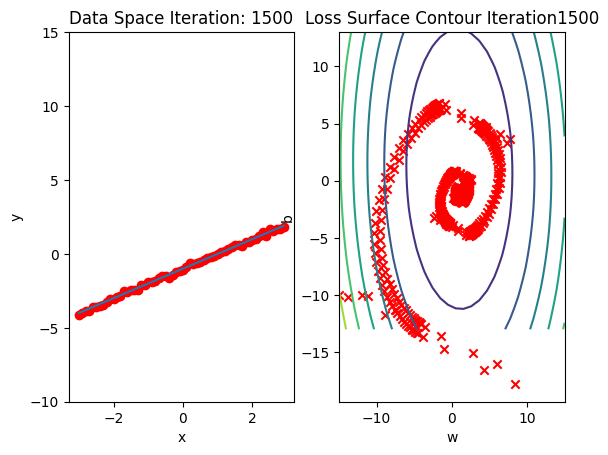

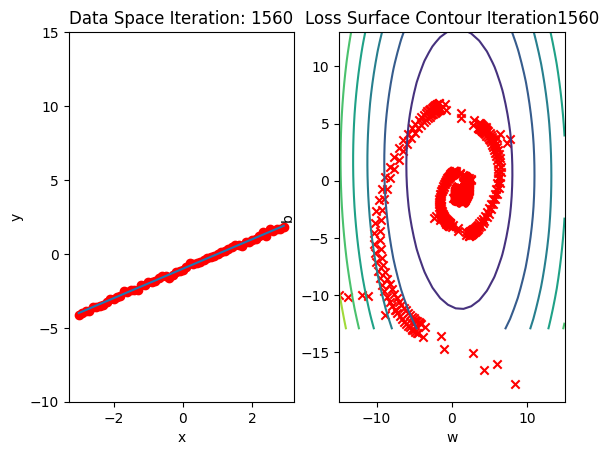

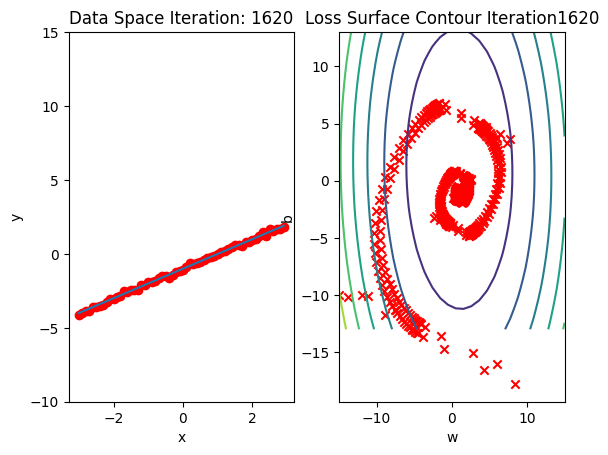

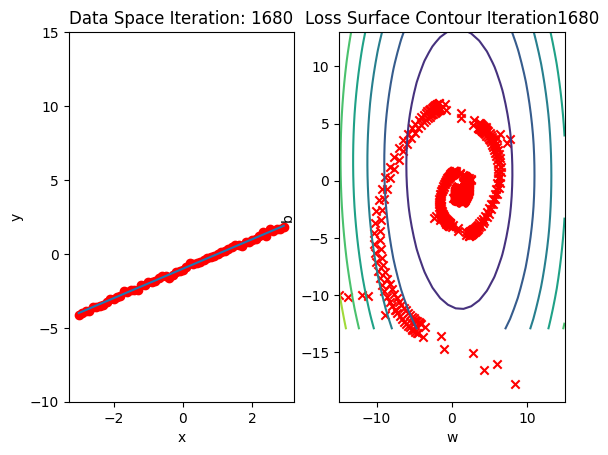

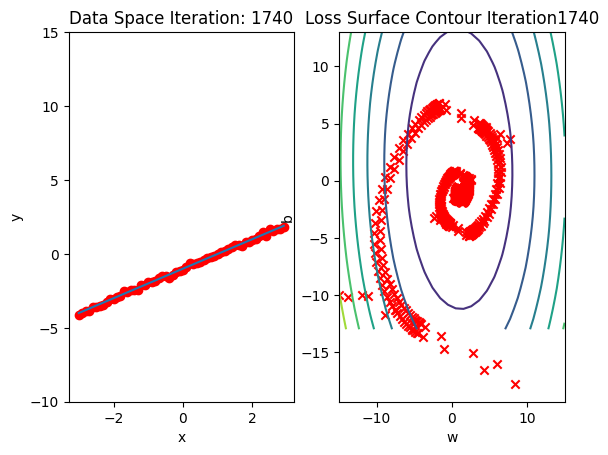

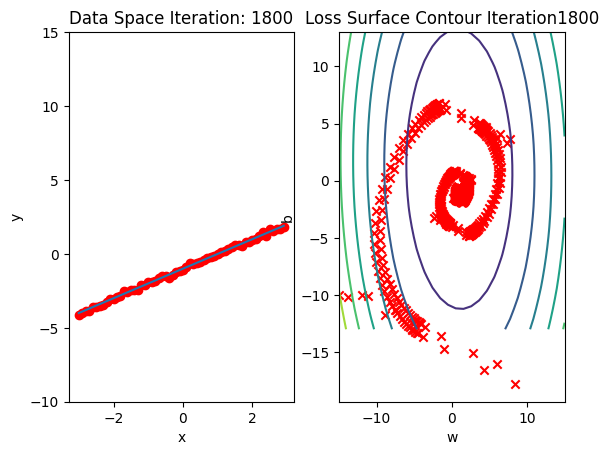

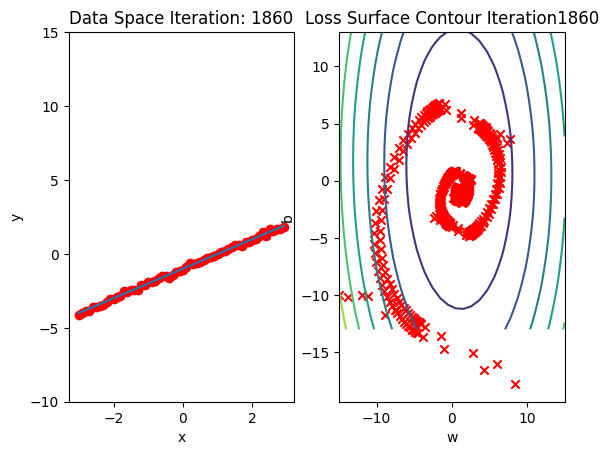

In [50]:
train_model(10)

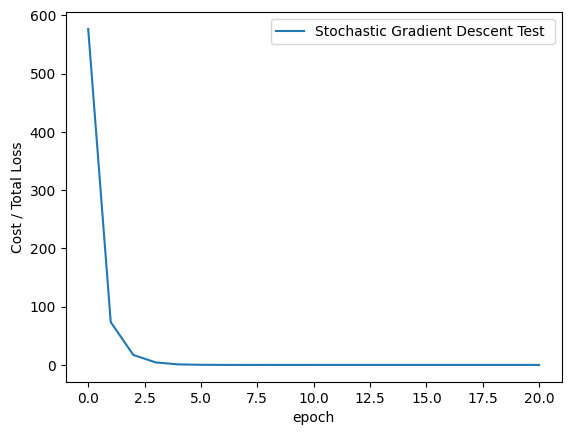

In [52]:
# plot the loss
plt.plot(LOSS, label = 'Stochastic Gradient Descent Test ')
plt.xlabel('epoch')
plt.ylabel('Cost / Total Loss')
plt.legend()
plt.show()